In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [2]:
def show_img(img):
    plt.style.use('dark_background')
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [8]:
def img_processing(img):
    # do something here

    # 先將圖片轉為灰階
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    # 將圖片做模糊化，可以降噪
    blur_img = cv2.medianBlur(img,5)  # cv2.GaussianBlur(img,(5,5),0)
    
    # 將小於閾值的灰度值設為0，其他值設為最大灰度值。>127 =255, <127 =0
    ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ret, blur_th1 = cv2.threshold(blur_img,127,255,cv2.THRESH_BINARY)
    
    # 將大於閾值的灰度值設為0，其他值設為最大灰度值。>127 =0, <127 =255
    ret, th2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
    ret, blur_th2 = cv2.threshold(blur_img,127,255,cv2.THRESH_BINARY_INV)
    
    # 將大於閾值的灰度值設為閾值，小於閾值的值保持不變。 >127 =127
    ret, th3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
    ret, blur_th3 = cv2.threshold(blur_img,127,255,cv2.THRESH_TRUNC)
    
    # 將小於閾值的灰度值設為0，大於閾值的值保持不變。 <127 =0
    ret, th4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
    ret, blur_th4 = cv2.threshold(blur_img,127,255,cv2.THRESH_TOZERO)
    
    # 將大於閾值的灰度值設為0，小於閾值的值保持不變。 >127 =0
    ret, th5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
    ret, blur_th5 = cv2.threshold(blur_img,127,255,cv2.THRESH_TOZERO_INV)

    # 一般圖算術平均法的自適應二值化
    adapt_th1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    blur_adapt_th1 = cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

    # 一般圖高斯加權均值法自適應二值化
    adapt_th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    blur_adapt_th2 = cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    
    # Otsu's thresholding
    ret2, otsu_th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    ret3, blur_otsu_th = cv2.threshold(blur_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # plot all the images and their histograms

    titles = ['Origin picture', 'cv2.THRESH_BINARY','cv2.THRESH_BINARY_INV', 
              '(Blur) Origin picture', '(Blur) cv2.THRESH_BINARY','(Blur) cv2.THRESH_BINARY_INV', 
              'cv2.THRESH_TRUNC','cv2.THRESH_TOZERO','cv2.THRESH_TOZERO_INV',
              '(Blur) cv2.THRESH_TRUNC','(Blur) cv2.THRESH_TOZERO','(Blur) cv2.THRESH_TOZERO_INV',
              'Adaptive Mean Threshold', 'Adaptive Gaussian Threshold', "Otsu's Thresholding", 
              '(Blur) Adaptive Mean Threshold', '(Blur) Adaptive Gaussian Threshold', "(Blur) Otsu's Thresholding" ]

    images = [img, th1, th2, 
              blur_img, blur_th1, blur_th2,
              th3, th4, th5, 
              blur_th3, blur_th4, blur_th5,
              adapt_th1, adapt_th2, otsu_th,
              blur_adapt_th1, blur_adapt_th2, blur_otsu_th]

    plt.figure(figsize=(15,30)) 
    for i in range(6):        
        plt.subplot(6,3,i*3+1)
        plt.imshow(images[i*3],'gray')
        plt.title(titles[i*3]) 
        
        plt.subplot(6,3,i*3+2)
        plt.imshow(images[i*3+1],'gray')
        plt.title(titles[i*3+1]) 
        
        plt.subplot(6,3,i*3+3)
        plt.imshow(images[i*3+2],'gray')
        plt.title(titles[i*3+2]) 
               
    plt.show()


origin picture:


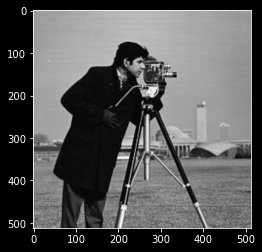

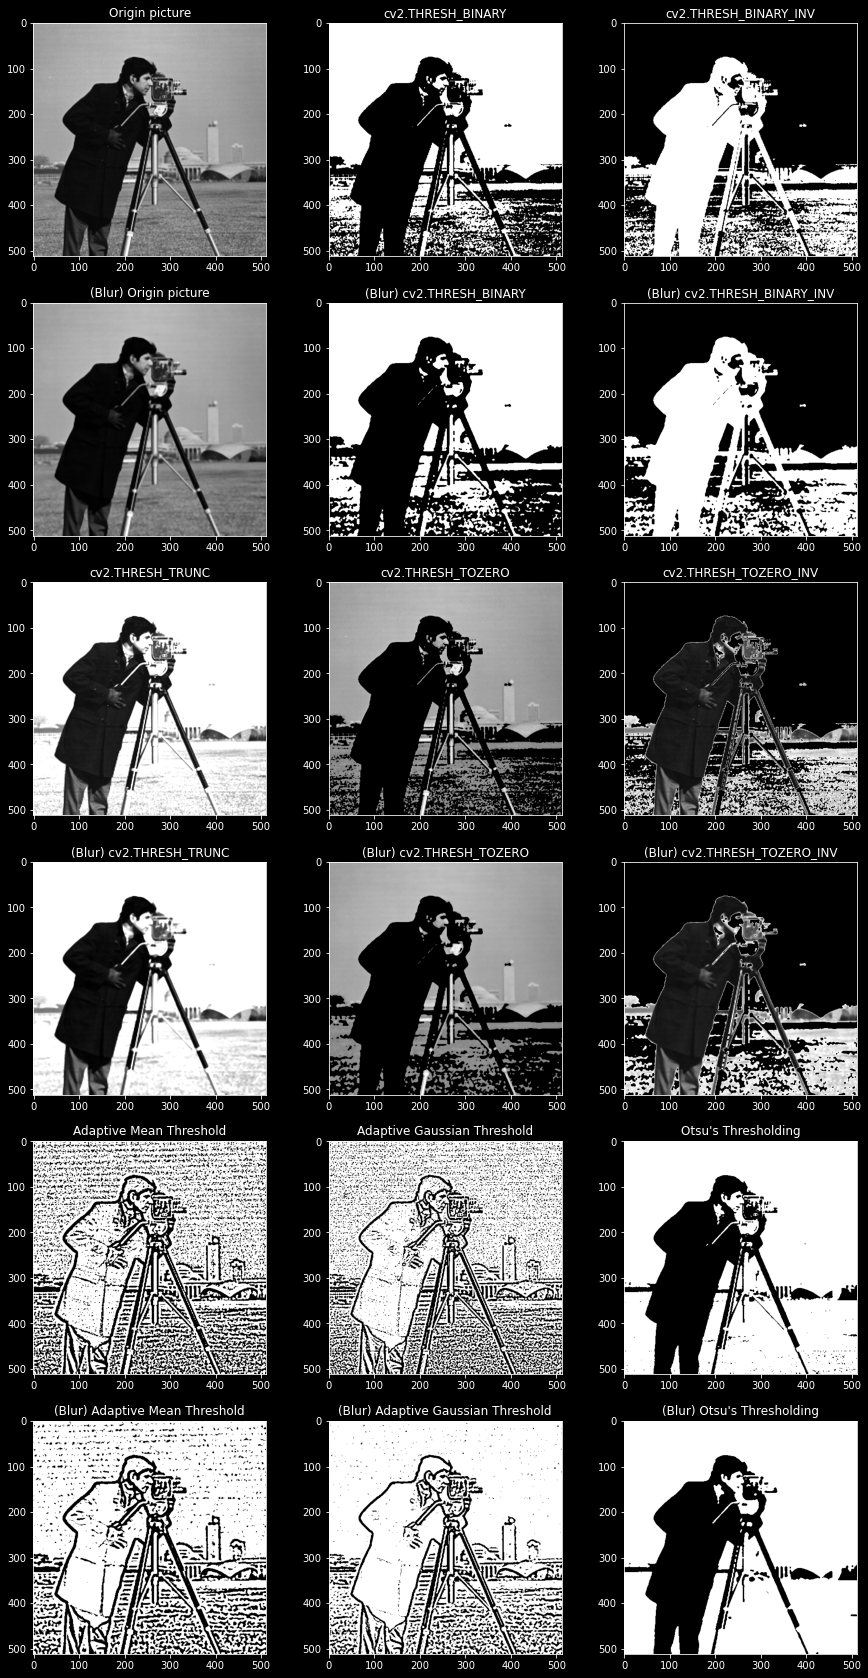

In [9]:
file_name = "./testdata/camera.jpg"
origin_img = cv2.imread(file_name)
print("origin picture:")
show_img(origin_img)

img_processing(origin_img)


# Reference

https://zh.wikipedia.org/wiki/%E5%A4%A7%E6%B4%A5%E7%AE%97%E6%B3%95

http://scipy-lectures.org/packages/scikit-image/auto_examples/plot_threshold.html

https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Global_Thresholding_Adaptive_Thresholding_Otsus_Binarization_Segmentations.php

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

http://gwang-cv.github.io/2017/08/25/python+opencv%E5%9B%BE%E5%83%8F%E4%BA%8C%E5%80%BC%E5%8C%96/

https://scikit-image.org/docs/0.13.x/auto_examples/xx_applications/plot_thresholding.html
